**Mini project on counting circular blobs**



In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title="", image = None, size =10):
    plt.figure(figsize=(size,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show

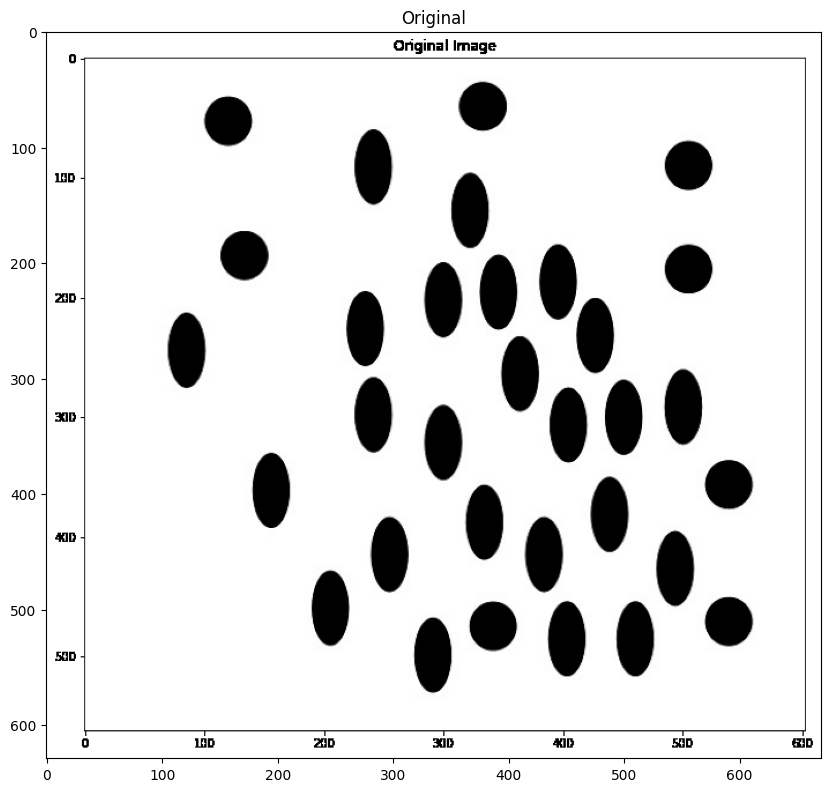

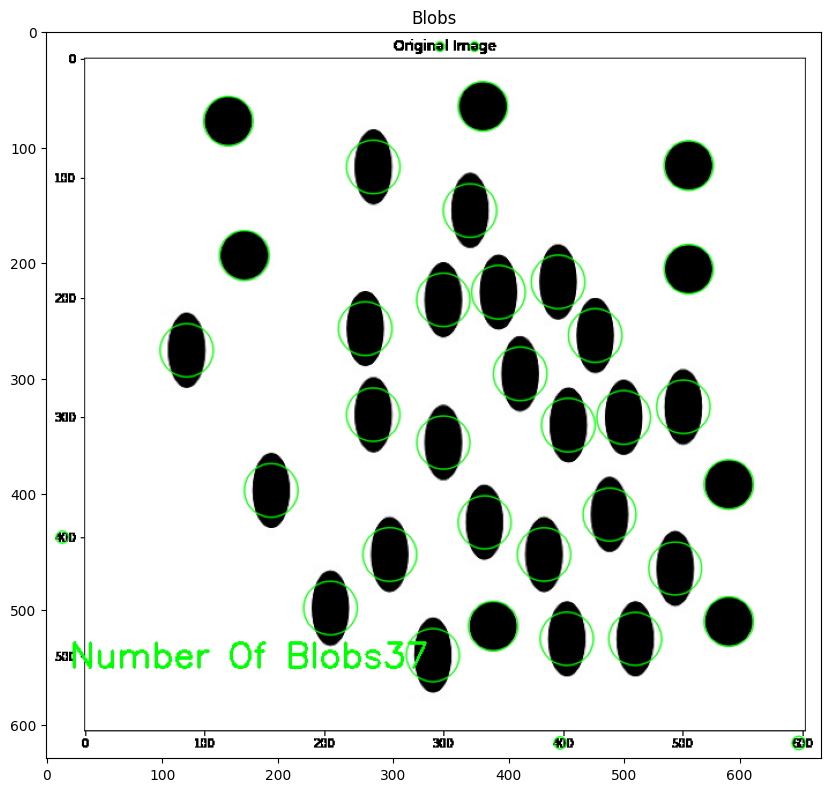

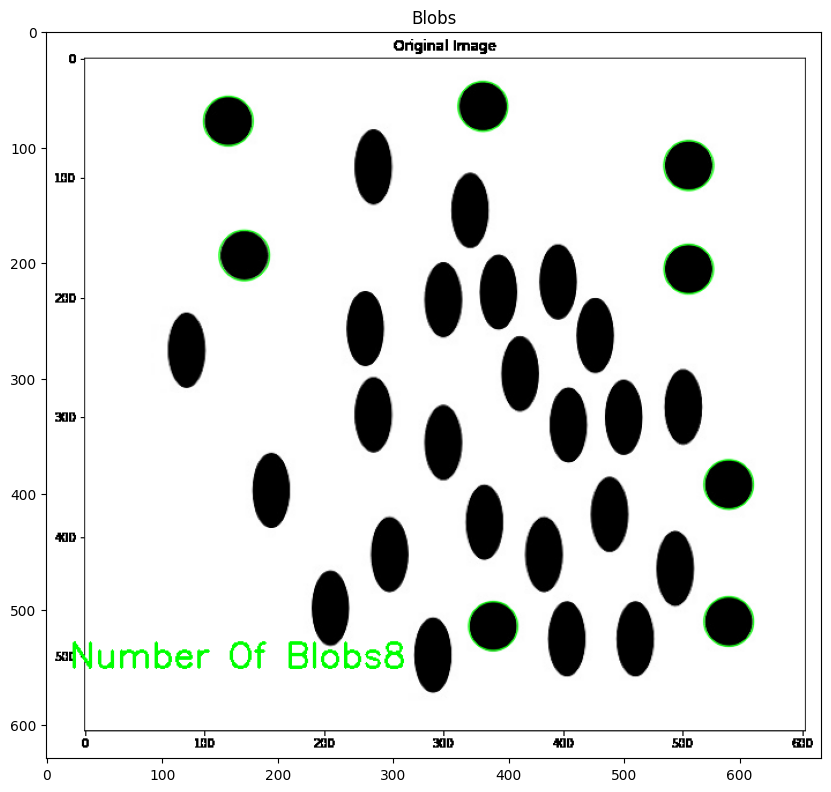

In [3]:
image = cv2.imread('/content/download.png')
imshow("Original", image)

detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
number_of_blobs = len(keypoints)
text = "Number Of Blobs" + str(len(keypoints))

cv2.putText(blobs, text, (20,550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
imshow("Blobs", blobs)


params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100

params.filterByCircularity = True
params.minCircularity = 0.9

params.filterByConvexity = True
params.minConvexity = 0.2

params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(image)

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number Of Blobs" + str(len(keypoints))

cv2.putText(blobs, text, (20,550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
imshow("Blobs", blobs)


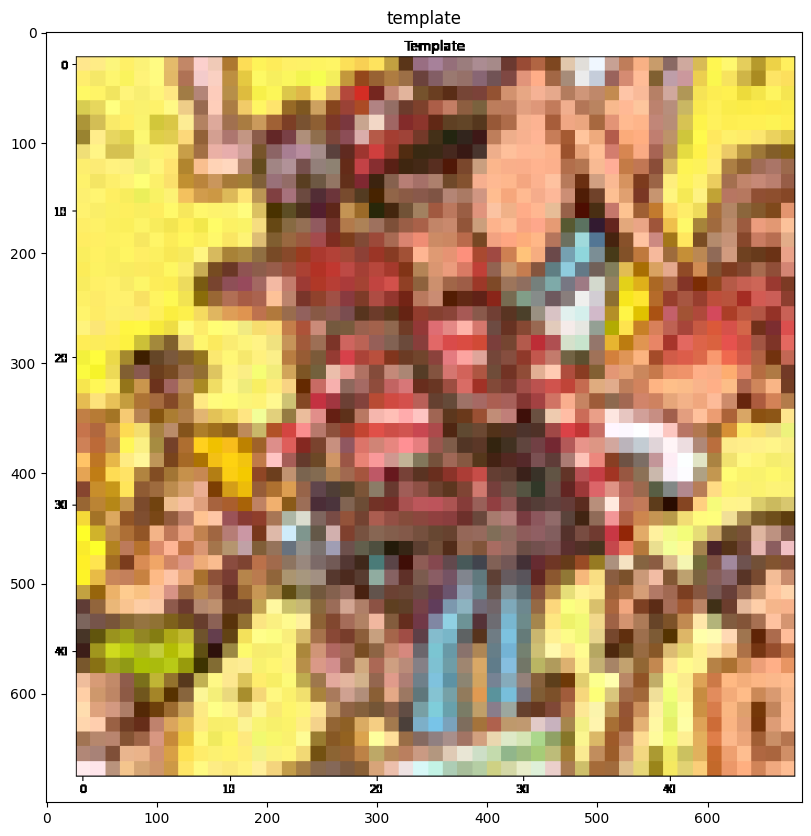

In [5]:
template = cv2.imread('/content/waldo.png')
imshow("template", template)

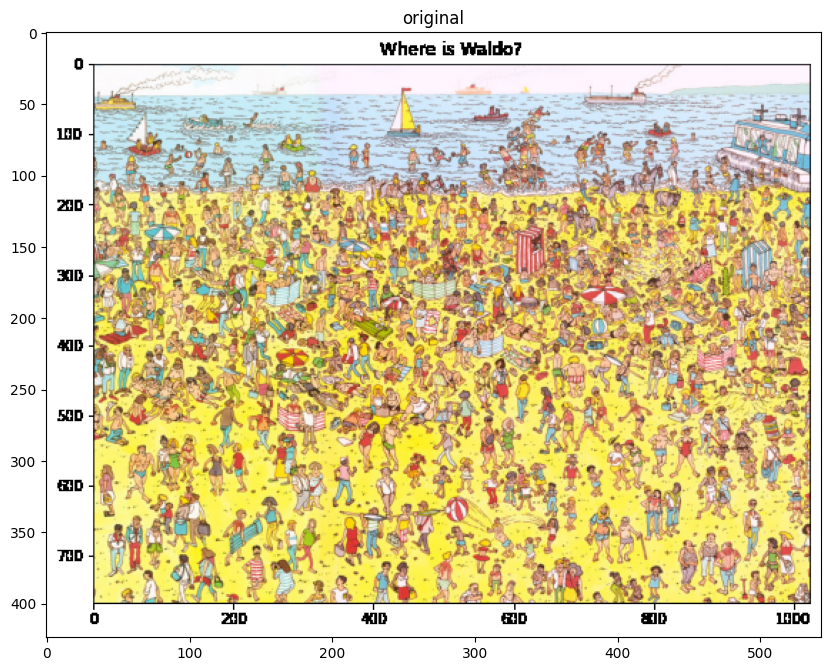

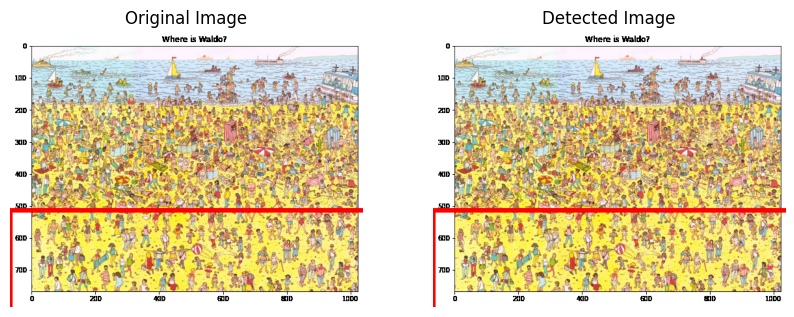

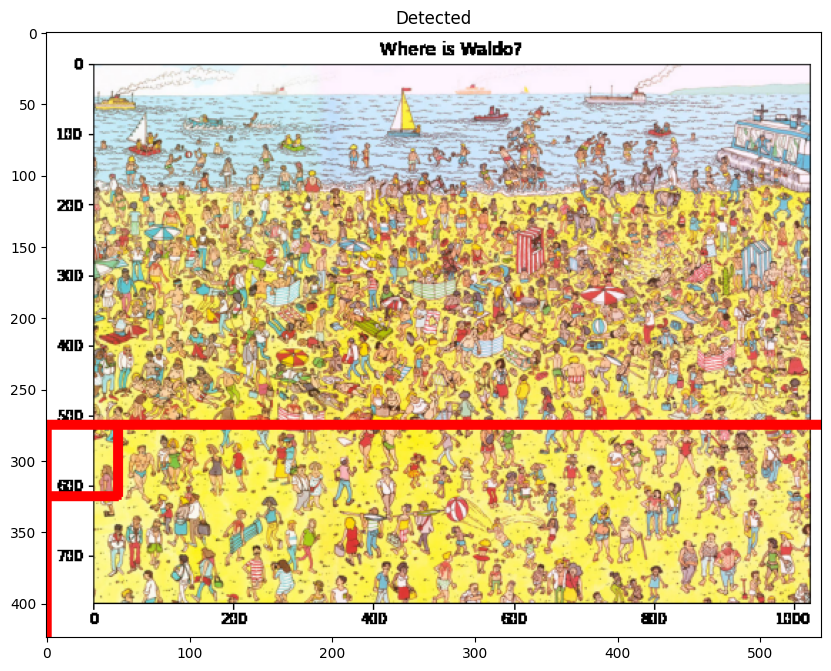

In [7]:
image = cv2.imread('/content/waldo beach.png')
imshow("original",image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert the template to grayscale as well
template = cv2.imread('/content/waldo.png')
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

result = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF) # Use template_gray
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
image = cv2.imread('/content/waldo beach.png')
template = cv2.imread('/content/waldo.png')

# Convert both images to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Perform template matching
result = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Get the size of the template
w, h = template_gray.shape[::-1]

# Create a bounding box
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 5)

# Display the original and detected images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Detected Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
#create a bounting box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)


imshow("Detected", image)